In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.interpolate import interp1d


In [2]:
beta_hel_minus = np.loadtxt('fe_beta_hel_minus.csv', delimiter = "; ")
beta_hel_plus = np.loadtxt('fe_beta_hel_plus.csv', delimiter = ';')
delta_hel_plus = np.loadtxt('fe_delta_hel_plus.csv', delimiter = ";")
delta_hel_minus = np.loadtxt('fe_delta_hel_minus.csv', delimiter = ";")

<IPython.core.display.Javascript object>


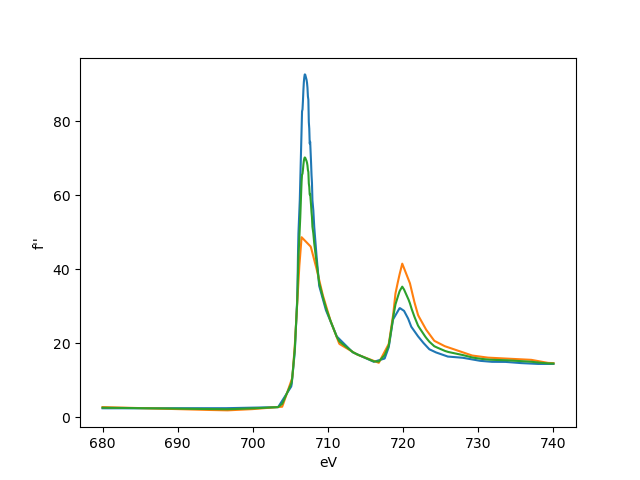

<ErrorbarContainer object of 3 artists>

In [15]:
%matplotlib notebook
#plt.errorbar(beta_hel_minus[:,0], beta_hel_minus[:,1], fmt = 'o')
#plt.errorbar(beta_hel_plus[:,0], beta_hel_plus[:,1], fmt = 'o')


def fix_dubplicates(arr):
    unique, unique_idx = np.unique(arr[:,0], return_index=True)
    filtered_vals = arr[:,1][unique_idx]
    combined = np.vstack((unique, filtered_vals))
    return combined

x = np.linspace(680, 740, 1000)
beta_minus = np.interp(x, *fix_dubplicates(beta_hel_minus))
beta_plus = np.interp(x, *fix_dubplicates(beta_hel_plus))
plt.xlabel('eV')
plt.ylabel('f\'\'')
plt.errorbar(x,beta_plus)
plt.errorbar(x,beta_minus)
beta_mean = beta_plus*0.5+beta_minus*0.5 
beta_diff = beta_plus - beta_mean
plt.errorbar(x, beta_mean)

<IPython.core.display.Javascript object>


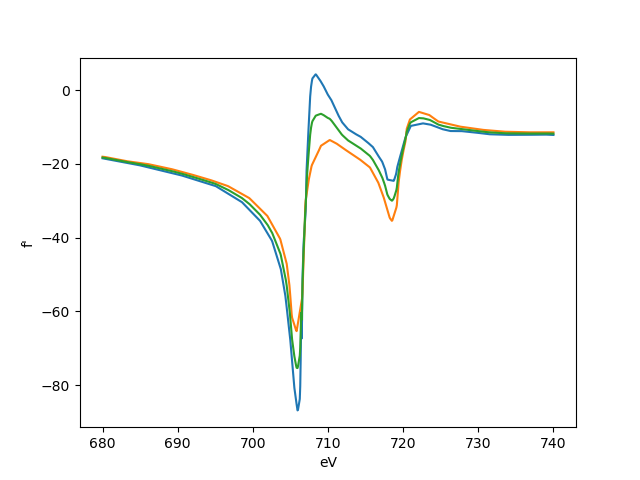

<ErrorbarContainer object of 3 artists>

In [14]:
%matplotlib notebook

#plt.errorbar(delta_hel_plus[:,0], delta_hel_plus[:,1], fmt = 'o')
#plt.errorbar(delta_hel_minus[:,0], delta_hel_minus[:,1], fmt = 'o')

x = np.linspace(680, 740, 1000)
delta_minus = np.interp(x, *fix_dubplicates(delta_hel_minus))
delta_plus = np.interp(x, *fix_dubplicates(delta_hel_plus))
plt.xlabel('eV')
plt.ylabel('f\'')
plt.errorbar(x,delta1)
plt.errorbar(x,delta2)
delta_mean = delta_minus*0.5+delta_plus*0.5 
delta_diff = delta_plus - delta_mean
plt.errorbar(x, delta_mean)

In [21]:
#fe_leonid.nff file
f = open("fe_leonid.nff", "w")
for e, f1, f2 in zip(x, delta_mean, beta_mean):
    f.write('   %e   %e   %e\n' % (e, f1, f2))
f.close()

f = open("fe_leonid.mf", "w")
for e, m1, m2 in zip(x, delta_diff, beta_diff):
    f.write('   %e   %e   %e\n' % (e, m1, m2))
f.close()